## 1. Load packages

In [1]:
library(speckle)
library(limma)
library(ggplot2)
library(ggpubr)
library(rstatix)
library(dplyr)
library(tidyr)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 2. Load data

In [2]:
cell_info <- read.table("/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/080cell_proportion/cell_info.tsv", header=TRUE, sep="\t", stringsAsFactors=FALSE)
head(cell_info)

,sample_id,barcode,leiden_mnc_0.8,leiden_harmony_0.8,pycisTopic_leiden_10_0.5,age_death,msex,pmi,region,subject,ad2,ad3
,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,D19-122585,TAGCACACAGTATACC-1,3,2,0,86,Male,6,EC,ROSMAP-86126,AD,earlyAD
2,D19-122585,AGGCCTGCAAACCCTA-1,0,0,0,86,Male,6,EC,ROSMAP-86126,AD,earlyAD
3,D19-122585,GATGATCCAATGAAAC-1,1,1,0,86,Male,6,EC,ROSMAP-86126,AD,earlyAD
4,D19-122585,GTCACCTAGAGCTACG-1,4,4,3,86,Male,6,EC,ROSMAP-86126,AD,earlyAD
5,D19-122585,AGATTCGTCGGTAGGA-1,1,1,3,86,Male,6,EC,ROSMAP-86126,AD,earlyAD
6,D19-122585,ACGGATTGTGTGCTTA-1,1,1,0,86,Male,6,EC,ROSMAP-86126,AD,earlyAD


## 3. Analysis

### 3.1 statistics

In [3]:
result<-propeller(
  sample = cell_info$sample_id,
  clusters = cell_info$pycisTopic_leiden_10_0.5,
  group = cell_info$ad2
)
result %>% filter(FDR < 0.05)

Performing logit transformation of proportions

group variable has 2 levels, t-tests will be performed



,BaselineProp.clusters,BaselineProp.Freq,PropMean.AD,PropMean.nonAD,PropRatio,Tstatistic,P.Value,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,3,0.1183562,0.09317764,0.1800758,0.5174356,-5.573284,5.476926e-08,4.929233e-07


In [4]:
result<-propeller(
  sample = cell_info$sample_id,
  clusters = cell_info$leiden_mnc_0.8,
  group = cell_info$ad2
)
result %>% filter(FDR < 0.05)

Performing logit transformation of proportions

group variable has 2 levels, t-tests will be performed



,BaselineProp.clusters,BaselineProp.Freq,PropMean.AD,PropMean.nonAD,PropRatio,Tstatistic,P.Value,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,4,0.0657779,0.03783718,0.1066088,0.3549162,-5.098526,6.133193e-07,4.293235e-06


In [5]:
result<-propeller(
  sample = cell_info$sample_id,
  clusters = cell_info$leiden_mnc_0.8,
  group = cell_info$region
)
result %>% filter(FDR < 0.05)

Performing logit transformation of proportions

group variable has > 2 levels, ANOVA will be performed



,BaselineProp,PropMean.AG,PropMean.EC,PropMean.HC,PropMean.MTC,PropMean.PFC,PropMean.TH,Fstatistic,P.Value,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0.05319430,0.01168200,0.004908849,0.01081511,0.008739683,0.19141074,0.01308610,136.971394,2.451596e-74,1.716117e-73
3,0.16255280,0.18038721,0.160957241,0.22329846,0.170630145,0.14466366,0.21711325,5.311258,1.093282e-04,3.826486e-04
6,0.03152499,0.04607237,0.024060789,0.02382912,0.045540891,0.04011288,0.03085791,4.635519,4.363516e-04,1.018154e-03
0,0.24432418,0.19429021,0.222950706,0.19502142,0.199407204,0.14730985,0.20982946,4.198735,1.062312e-03,1.859046e-03
2,0.21574710,0.22058821,0.359133037,0.23933844,0.237137944,0.22260738,0.20015109,3.318077,6.248797e-03,7.895431e-03
4,0.06577790,0.10139614,0.053855347,0.04976371,0.100439579,0.07331081,0.05601941,3.261319,6.994472e-03,7.895431e-03
1,0.22687874,0.24558386,0.174134030,0.25793374,0.238104554,0.18058468,0.27294278,3.200186,7.895431e-03,7.895431e-03


In [6]:
result<-propeller(
  sample = cell_info$sample_id,
  clusters = cell_info$leiden_mnc_0.8,
  group = cell_info$msex
)
result %>% filter(FDR < 0.05)

Performing logit transformation of proportions

group variable has 2 levels, t-tests will be performed



BaselineProp.clusters,BaselineProp.Freq,PropMean.Female,PropMean.Male,PropRatio,Tstatistic,P.Value,FDR
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [8]:
cluster_counts <- cell_info %>%
  group_by(leiden_mnc_0.8, ad2) %>%
  summarise(count = n()) %>%
  ungroup()
  
cluster_counts %>%
  group_by(leiden_mnc_0.8) %>%
  summarise(total_count = sum(count))

`summarise()` has grouped output by 'leiden_mnc_0.8'. You can override using
the `.groups` argument.


leiden_mnc_0.8,total_count
<int>,<int>
0,11106
1,10313
2,9807
3,7389
4,2990
5,2418
6,1433


In [9]:
cluster_counts <- cell_info %>%
  group_by(pycisTopic_leiden_10_0.5, ad2) %>%
  summarise(count = n()) %>%
  ungroup()

cluster_counts %>%
  group_by(pycisTopic_leiden_10_0.5) %>%
  summarise(total_count = sum(count))

`summarise()` has grouped output by 'pycisTopic_leiden_10_0.5'. You can
override using the `.groups` argument.


pycisTopic_leiden_10_0.5,total_count
<int>,<int>
0,13557
1,9117
2,7159
3,5380
4,3847
5,2127
6,1732
7,1546
8,991


### 3.2 plots

Performing logit transformation of proportions



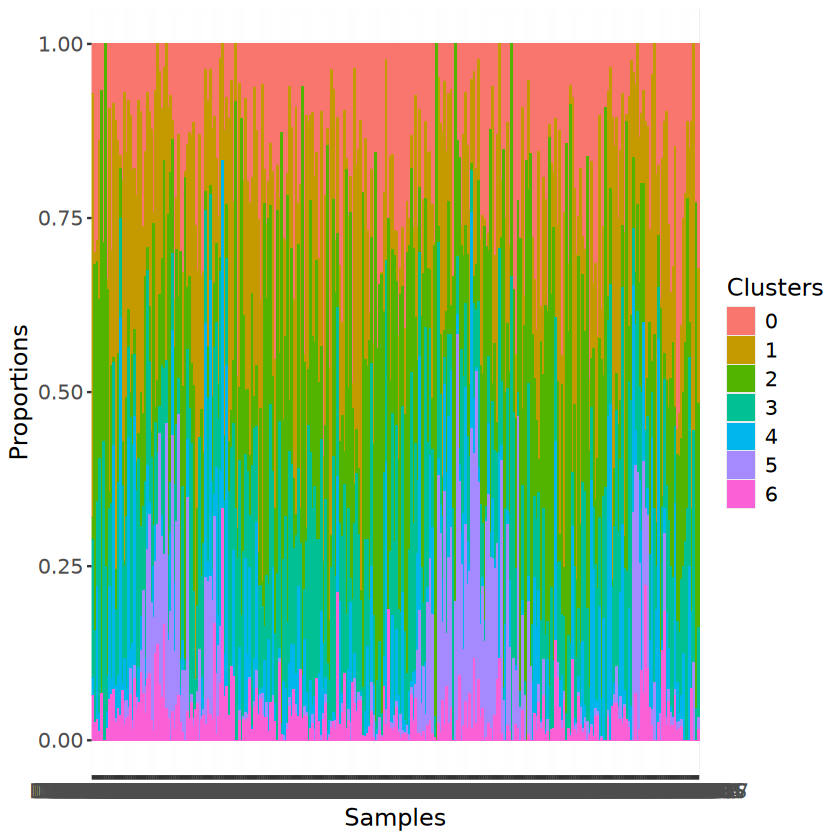

In [11]:
plotCellTypeProps(clusters=cell_info$leiden_mnc_0.8, sample=cell_info$sample_id)

Performing logit transformation of proportions



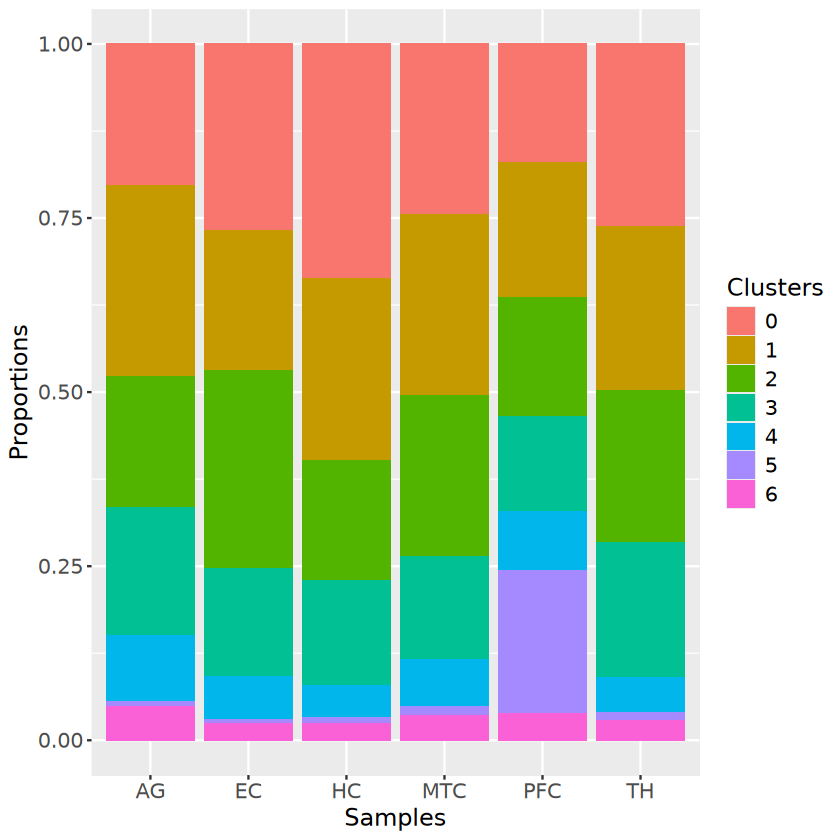

In [12]:
plotCellTypeProps(clusters=cell_info$leiden_mnc_0.8, sample=cell_info$region)

Performing logit transformation of proportions



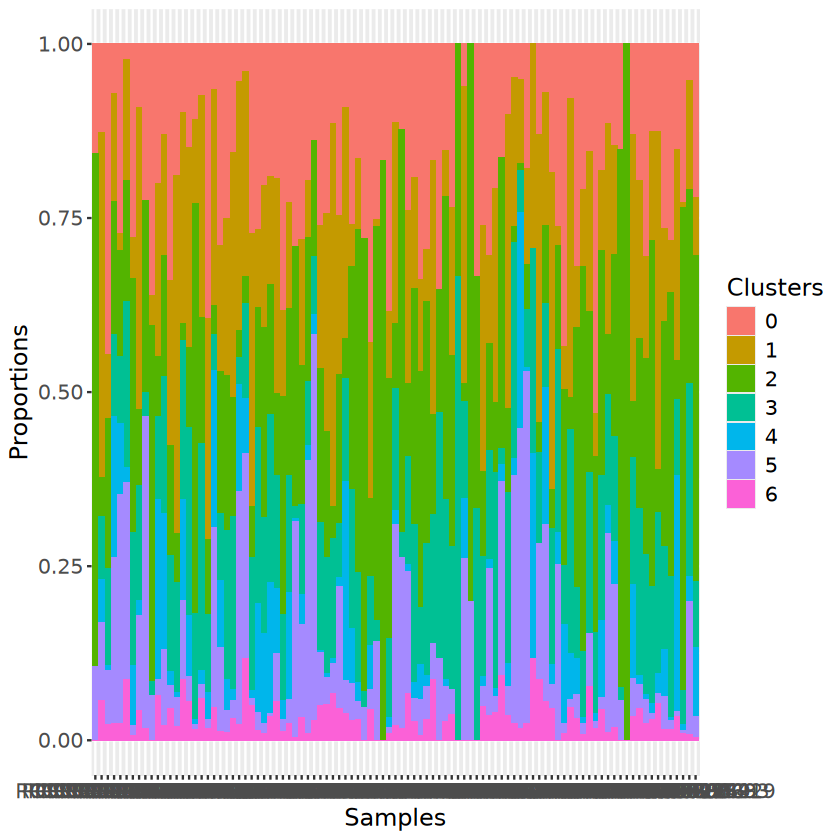

In [13]:
plotCellTypeProps(clusters=cell_info$leiden_mnc_0.8, sample=cell_info$subject)

Performing logit transformation of proportions



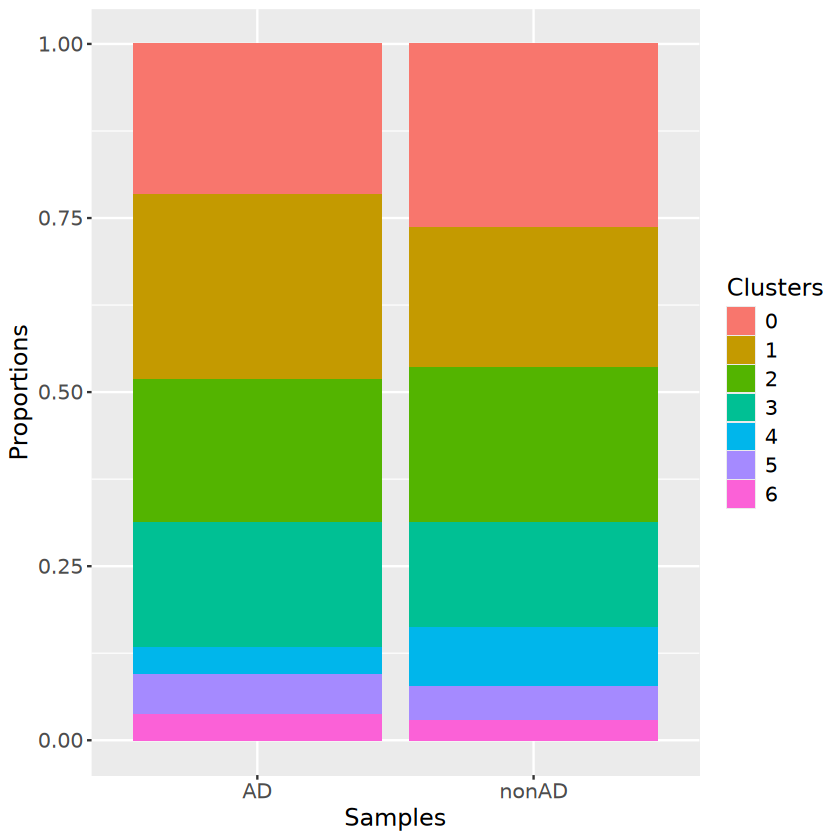

In [15]:
plotCellTypeProps(clusters=cell_info$leiden_mnc_0.8, sample=cell_info$ad2)

Performing logit transformation of proportions



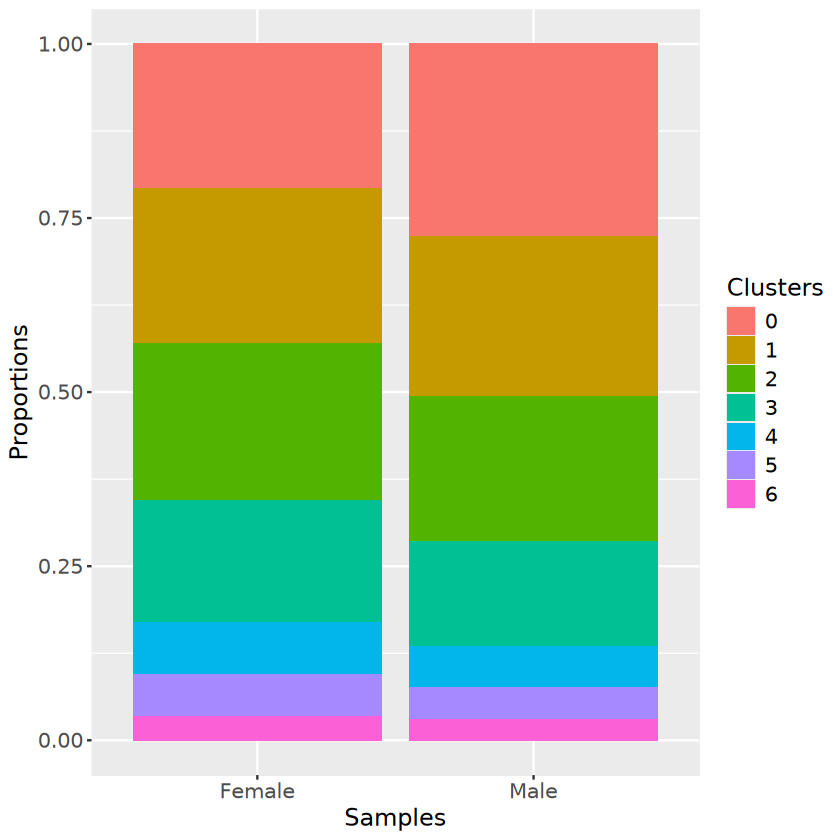

In [16]:
plotCellTypeProps(clusters=cell_info$leiden_mnc_0.8, sample=cell_info$msex)

Performing logit transformation of proportions



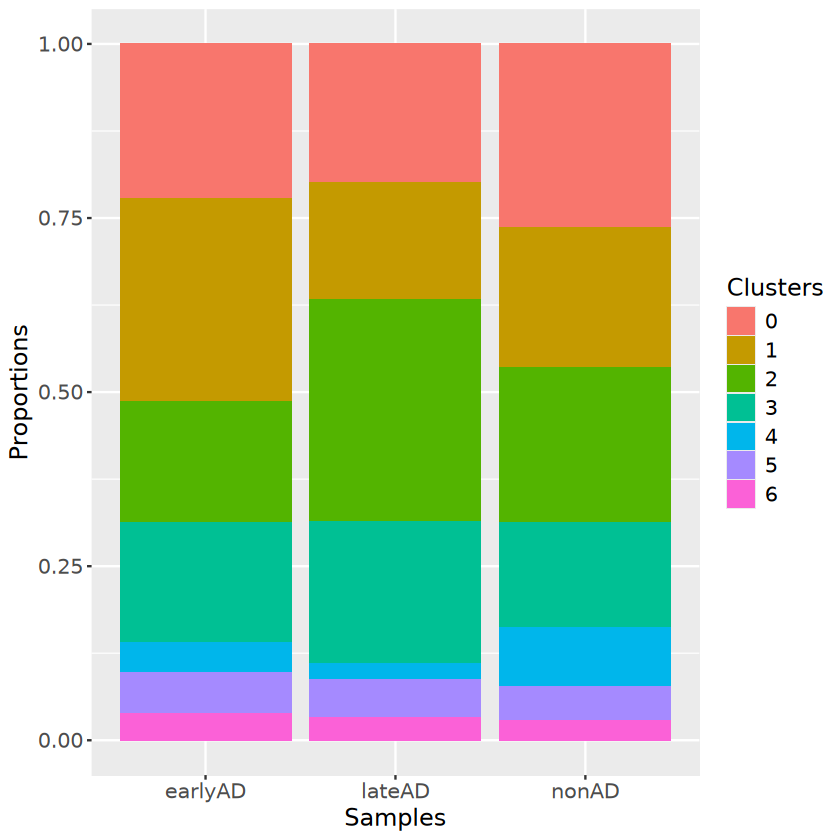

In [17]:
plotCellTypeProps(clusters=cell_info$leiden_mnc_0.8, sample=cell_info$ad3)

`summarise()` has grouped output by 'sample_id'. You can override using the
`.groups` argument.


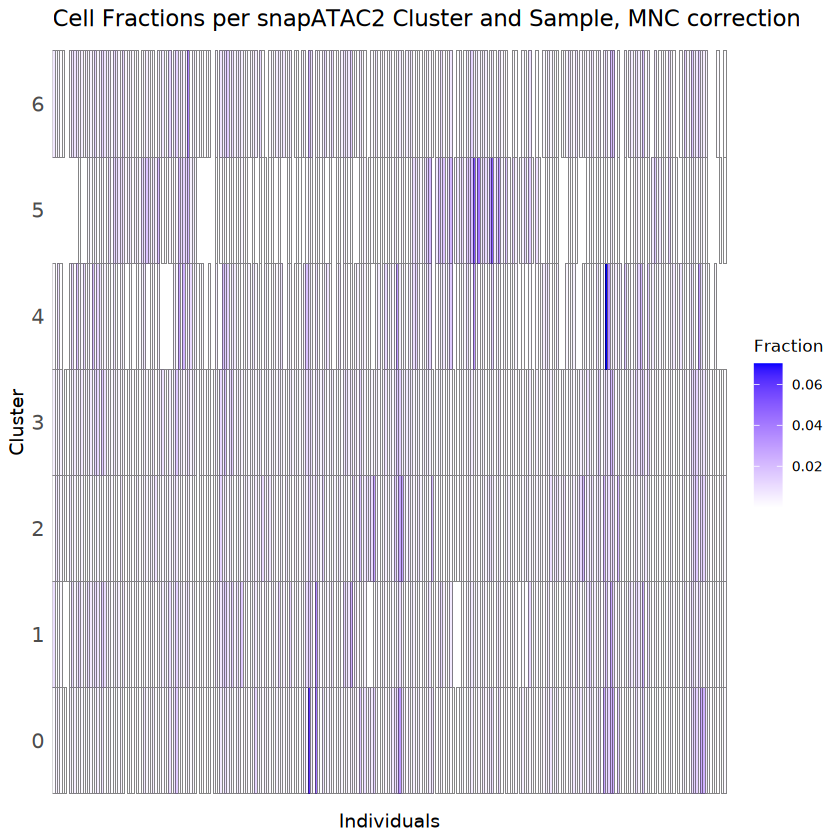

In [18]:
# Summarize the data to calculate cell fractions
cell_fractions <- cell_info %>%
  group_by(sample_id, leiden_mnc_0.8) %>%
  summarise(count = n()) %>%
  ungroup() %>%
  group_by(leiden_mnc_0.8) %>%
  mutate(fraction = count / sum(count)) %>%
  ungroup()

# Ensure leiden_mnc_0.8 is a factor
cell_fractions$leiden_mnc_0.8 <- as.factor(cell_fractions$leiden_mnc_0.8)

# Create the plot with each cluster as a row
ggplot(cell_fractions, aes(x = sample_id, y = leiden_mnc_0.8, fill = fraction)) +
  geom_tile(color = "black") +
  scale_fill_gradient(low = "white", high = "blue", name = "Fraction") +
  labs(x = "Individuals", y = "Cluster", title = "Cell Fractions per snapATAC2 Cluster and Sample, MNC correction") +
  theme_minimal() +
  theme(axis.text.x = element_blank(), # Hide x-axis text for better visualization
        axis.ticks.x = element_blank(), # Hide x-axis ticks
        axis.text.y = element_text(size = 12), # Increase y-axis text size
        panel.grid = element_blank(),   # Remove grid lines
        legend.title = element_text(size = 10), # Set legend title size
        legend.text = element_text(size = 8)) # Set legend text size



`summarise()` has grouped output by 'sample_id'. You can override using the
`.groups` argument.


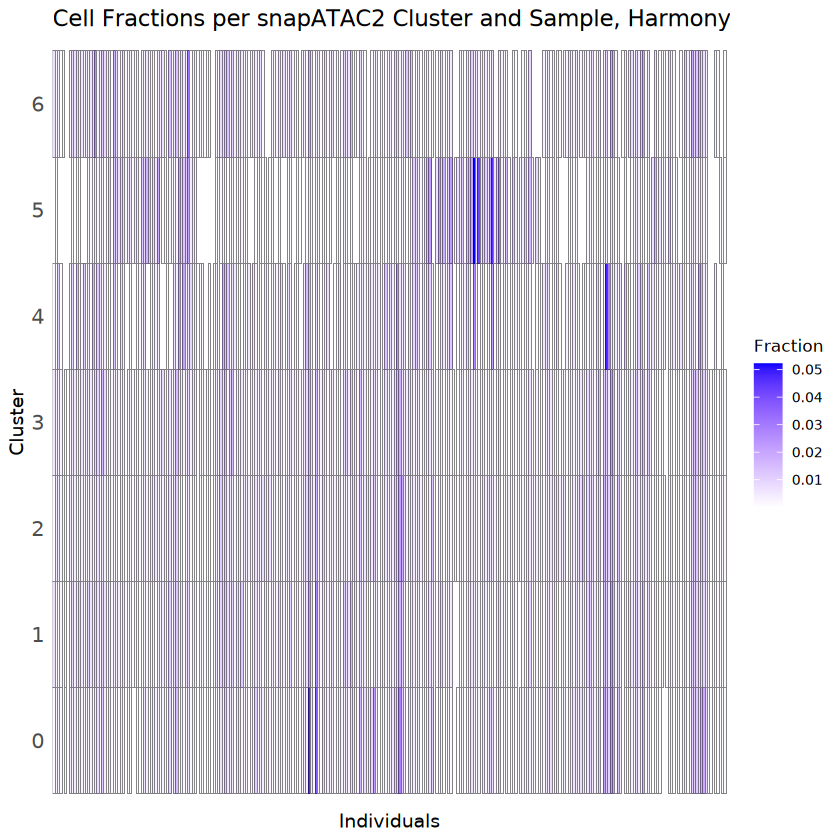

In [19]:
cell_fractions <- cell_info %>%
  group_by(sample_id, leiden_harmony_0.8) %>%
  summarise(count = n()) %>%
  ungroup() %>%
  group_by(leiden_harmony_0.8) %>%
  mutate(fraction = count / sum(count)) %>%
  ungroup()

# Ensure leiden_mnc_0.8 is a factor
cell_fractions$leiden_harmony_0.8 <- as.factor(cell_fractions$leiden_harmony_0.8)

# Create the plot with each cluster as a row
ggplot(cell_fractions, aes(x = sample_id, y = leiden_harmony_0.8, fill = fraction)) +
  geom_tile(color = "black") +
  scale_fill_gradient(low = "white", high = "blue", name = "Fraction") +
  labs(x = "Individuals", y = "Cluster", title = "Cell Fractions per snapATAC2 Cluster and Sample, Harmony") +
  theme_minimal() +
  theme(axis.text.x = element_blank(), # Hide x-axis text for better visualization
        axis.ticks.x = element_blank(), # Hide x-axis ticks
        axis.text.y = element_text(size = 12), # Increase y-axis text size
        panel.grid = element_blank(),   # Remove grid lines
        legend.title = element_text(size = 10), # Set legend title size
        legend.text = element_text(size = 8)) # Set legend text size

`summarise()` has grouped output by 'sample_id'. You can override using the
`.groups` argument.


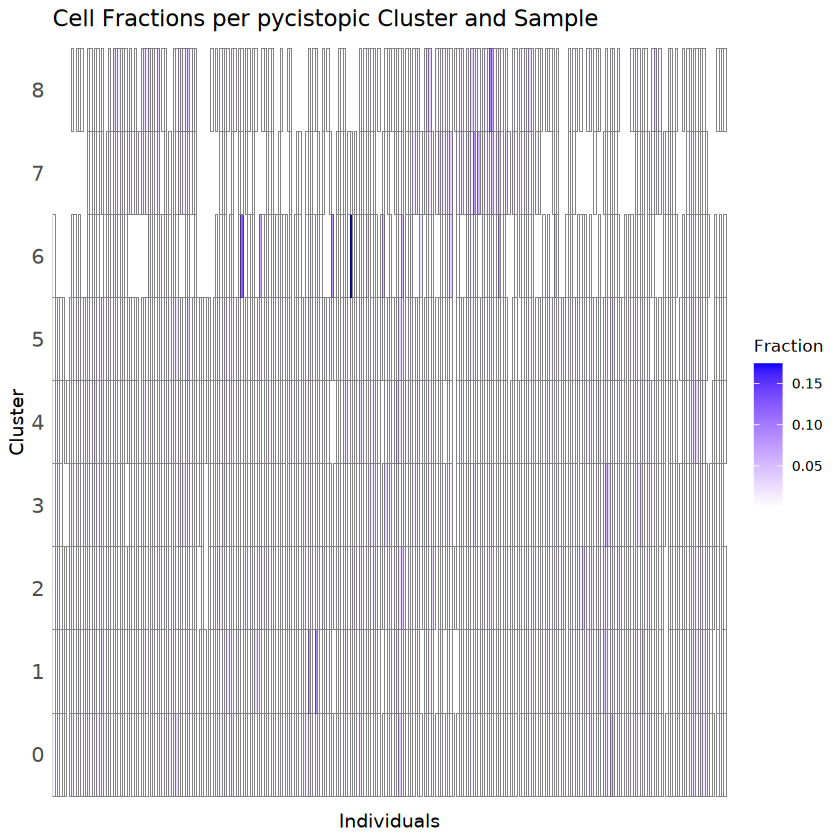

In [20]:
# Summarize the data to calculate cell fractions
cell_fractions <- cell_info %>%
  group_by(sample_id, pycisTopic_leiden_10_0.5) %>%
  summarise(count = n()) %>%
  ungroup() %>%
  group_by(pycisTopic_leiden_10_0.5) %>%
  mutate(fraction = count / sum(count)) %>%
  ungroup()

# Ensure leiden_mnc_0.8 is a factor
cell_fractions$pycisTopic_leiden_10_0.5 <- as.factor(cell_fractions$pycisTopic_leiden_10_0.5)

# Create the plot with each cluster as a row
ggplot(cell_fractions, aes(x = sample_id, y = pycisTopic_leiden_10_0.5, fill = fraction)) +
  geom_tile(color = "black") +
  scale_fill_gradient(low = "white", high = "blue", name = "Fraction") +
  labs(x = "Individuals", y = "Cluster", title = "Cell Fractions per pycistopic Cluster and Sample") +
  theme_minimal() +
  theme(axis.text.x = element_blank(), # Hide x-axis text for better visualization
        axis.ticks.x = element_blank(), # Hide x-axis ticks
        axis.text.y = element_text(size = 12), # Increase y-axis text size
        panel.grid = element_blank(),   # Remove grid lines
        legend.title = element_text(size = 10), # Set legend title size
        legend.text = element_text(size = 8)) # Set legend text size

